In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
df=pd.read_csv(r"C:\Users\yuvim\OneDrive\Documents\PRCP-1018-BikeRental\Data\day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Task 1:

In [24]:
print(df.head())
print(df.info())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

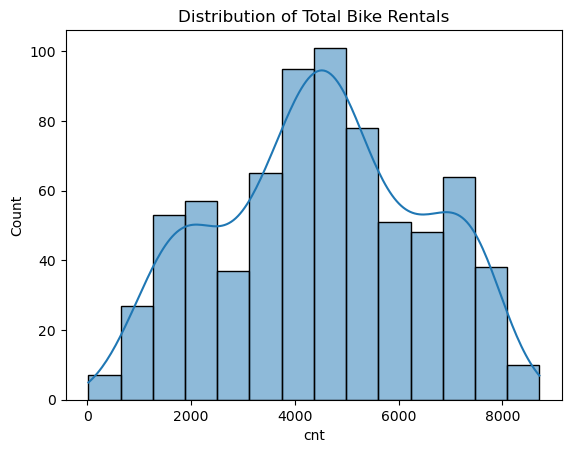

In [26]:
sns.histplot(df['cnt'], kde=True)
plt.title('Distribution of Total Bike Rentals')
plt.show()

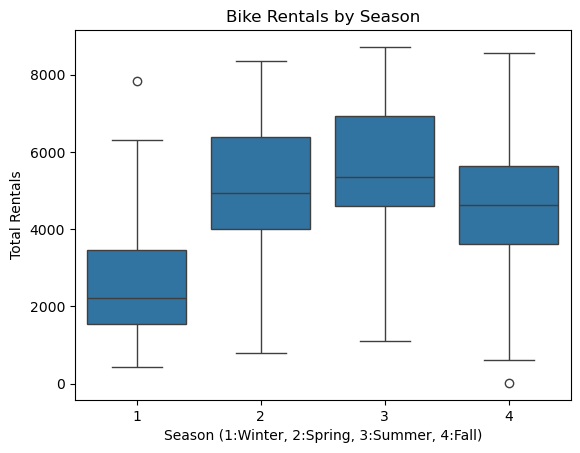

In [29]:
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Bike Rentals by Season')
plt.xlabel('Season (1:Winter, 2:Spring, 3:Summer, 4:Fall)')
plt.ylabel('Total Rentals')
plt.show()

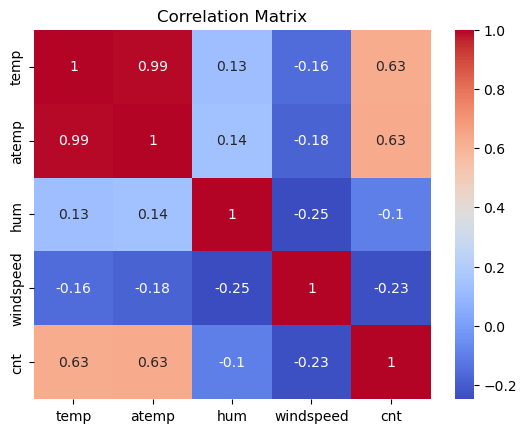

In [30]:
corr_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Task 2:

In [32]:
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
target = 'cnt'
X = df[features]
y = df[target]

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
## Model Training and Evaluation
### Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression MSE: {lr_mse:.2f}, R-squared: {lr_r2:.2f}")


Linear Regression MSE: 691035.01, R-squared: 0.83


In [35]:
### Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse:.2f}, R-squared: {rf_r2:.2f}")

Random Forest MSE: 458446.95, R-squared: 0.89


## Model Comparison Report:

In [41]:
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [lr_mse, rf_mse],
    'R-squared': [lr_r2, rf_r2]
})

print("\nModel Performance Report:")
print(model_performance)

if rf_r2 > lr_r2:
    print("\nRandom Forest Regressor is the better model for production due to its higher R-squared score, "
          "indicating it explains more of the variance in the data.")
else:
    print("\nLinear Regression is the better model for production.")



Model Performance Report:
               Model            MSE  R-squared
0  Linear Regression  691035.008202   0.827667
1      Random Forest  458446.947587   0.885671

Random Forest Regressor is the better model for production due to its higher R-squared score, indicating it explains more of the variance in the data.


## Report on Challenges faced:

## Data Cleaning Challenges
Challenge: Missing or incorrect data values.

Technique: Use `.dropna()` or `.fillna()` for missing values, or explore data to find and fix inconsistencies.

Reasoning: Ensuring data integrity is crucial for accurate model training.

## Feature Engineering Challenges
Challenge: The `dteday` column is an object, but models need numerical data.

Technique: Convert `dteday` to a datetime object to extract features like month or weekday if not already provided.

Reasoning: Transforming data into a usable format is a fundamental step in machine learning.